# Homework 2 -  Classification and Neural Networks

## Xi Chen
Netid:  xc166

# 1) Mathematical description of NN

### (2.5 points)

Let's assume you have a deep neural network with 10 input neurons, one hidden layer with 50 neurons, and one output layer with 3 neurons. All neurons use the hyperbolic tangent as activation. 

**(a)** What are the dimensions of a pair of feature and target variables $\bf x_i$  and $\bf y_i$? (*0.5 points*)

**(b)** What are the dimensions of the first weight matrix $\bf w_1$ and the corresponding bias vector $\bf b_1$?  (*0.5 points*)  

**(c)** What are the dimensions of the weight matrix $\bf w_2$ and the bias vector $\bf b_2$ of the output layer?   (*0.5 points*)

**(d)** Write down the equation to compute $\bf y_i$. (*0.5 points*)

**(e)** How many trainable parameters does this network have? (*0.5 points*)

**ANSWER**

(a) deminsions of xi is (10,1)
deminsions of yi is (3,1)

(b)deminsions of w1 is (50,10)
deminsions of b1 is (50,1)

(c)deminsions of w2 is (3,50)
deminsions of b2 is (3,1)

(d)yi = tanh(w2 * tanh(w1 * xi + b1) + b2)

(e)10 * 50+50 * 3+50+3=703

# 2) Classification with a deep neural network 
### (4 points)

**(a)** Create 1000 training and 400 test data points with the make_moons function from Scikit Learn. Set the noise level to 0.2. (*0.5 points*)

**(b)**  Design a neural network using Keras. The first hidden layer has 100 neurons with rectified linear units as activation. The second hidden layer has 25 neurons and also rectified linear units as activation. The output layer uses 
sigmoid activation. The loss function is binary crossentropy, the gradient descent method is Adam and the metric used for evaluation is accuracy. (*1 point*)

**(c)** Train the network with a batch size of 64 for 100 epochs. Use early stopping if the validation loss does not change over 4 epochs. Report the test accuracy. (*0.5 point*)

**(d)** Plot the test data points together with a mesh indicating the prediction of the neural network. (You can reuse the code from the logistic regression examle.)  (*0.5 point*)

**(e)** Make two figures showing the evolution of loss and accuracy as a function of number of epochs. In both figures show training and test results.(*0.5 point*)

**(f)** Create a new model where you change the the activation of the two hidden layers to sigmoid. Train it and plot the prediction together with the test data (as in part d) (*1 point*)

**ANSWER**

In [1]:

from sklearn.datasets import make_moons
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# (a)
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

x, y = make_moons(n_samples=1400, noise=0.2, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=400, random_state=0)


In [3]:
# (b)
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [4]:
# (c)
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping],verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)


13/13 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9725
Test Accuracy: 0.9725000262260437


5042/5042 [==============================] - 3s 667us/step


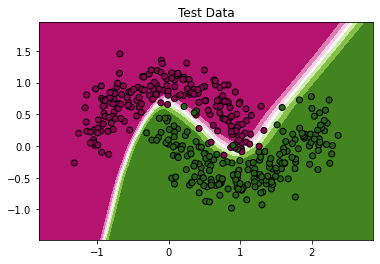

In [5]:
# (d)
import matplotlib.pyplot as plt
import numpy as np
cm = plt.cm.PiYG
def plot(model, x, y, title):
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h).reshape(-1,1), np.arange(y_min, y_max, h).reshape(-1,1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm, edgecolors='k')
    plt.title(title)
    plt.show()
plot(model, x_test, y_test, "Test Data")


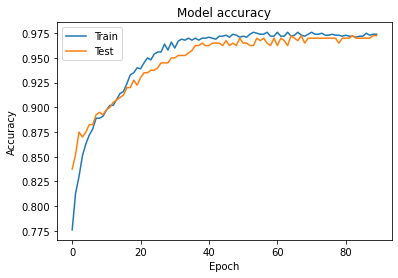

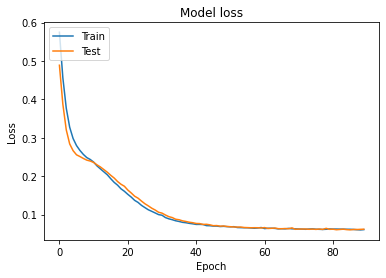

In [6]:
# (e)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


5042/5042 [==============================] - 3s 650us/step


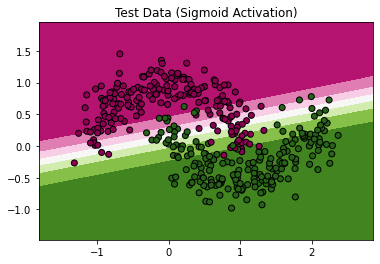

In [7]:
# (f)
model_sigmoid = Sequential()
model_sigmoid.add(Dense(100, activation='sigmoid', input_dim=2))
model_sigmoid.add(Dense(25, activation='sigmoid'))
model_sigmoid.add(Dense(1, activation='sigmoid'))
model_sigmoid.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_sigmoid = model_sigmoid.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping],verbose=0)
plot(model_sigmoid, x_test, y_test, "Test Data (Sigmoid Activation)")


# 3) Precision or recall
### (1 point)

Invent a new (i.e. not yet exisiting) machine learning classifier, one that you would like to use in **your personal** daily life. Would you rather want a high precision, recall, or do they matter both? 



**ANSWER**
i want to invent a machine learning classifier to classify my daily activity into "inportant" and "unimportant". I would focus on recall over precision since if something is important but 

# 4) Demonstration of the universal approximation theorem
### (4.5 points)


**(a)**  Write a function which computes $f(x)=0.2 + 0.4 \;x^2 + 0.3 \;x\; sin(9x)$. Create a vector x_train which contains 10000 evenly spaced points between 0 and 1. Compute the vector y_train = f(x_train). Plot y_train versus x_train. This is the function we want to approximate with a neural network containing one hidden layer. (*1 point*)

**(b)**  Create a neural network with one input neuron, a hidden layer with 50 neurons and sigmoid activation and one output neuron with linear activation. Choose Mean Squared Error as loss function and Adam(learning_rate=0.005) as gradient descent method. Train the model with a batch size of 2000 for 4000 epochs. (We do not need test data in this demonstration.)

After training the network make a prediction using x_train and plot this prediction together with y_train (i.e. the function the network tries to approximate). (*2 points*)

**(c)**  Plot the evolution of the loss function with a logarithmic y-axis. Then re-initialize the network (!) and rerun the training with the learning rate for Adam set to 0.002. Plot again the evolution of the loss function-
Describe in one sentence how this curve has changed.  
(*1.5 points*)

**ANSWER**

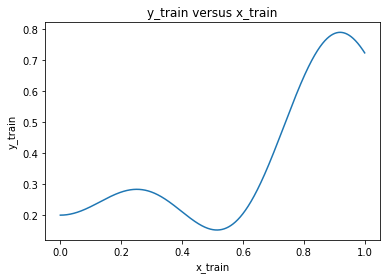

In [8]:
# (a)
def f(x):
    return 0.2+0.4*np.power(x,2)+0.3*x*np.sin(9*x)
x_train=np.linspace(0,1,num=10000)
y_train=f(x_train)
plt.plot(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('y_train versus x_train')
plt.show()


313/313 [==============================] - 0s 698us/step


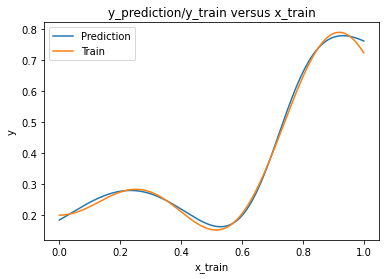

In [9]:

#(b)
model = Sequential()
model.add(Dense(50, activation='sigmoid',input_shape=(1,)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error',optimizer= tf.keras.optimizers.Adam(learning_rate=0.005))
history = model.fit(x_train, y_train,batch_size=2000,epochs=4000,verbose=0)
y_prediction=model.predict(x_train)
plt.plot(x_train, y_prediction)
plt.plot(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y')
plt.title('y_prediction/y_train versus x_train')
plt.legend(['Prediction', 'Train'], loc='upper left')
plt.show()

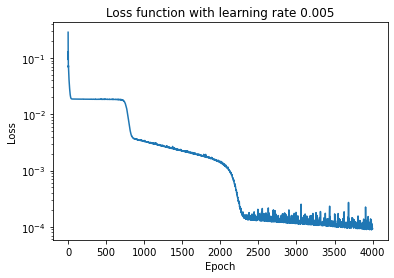

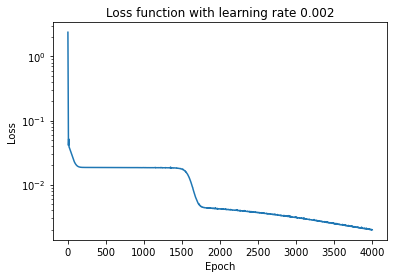

In [10]:
# (c)
plt.plot(history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Loss function with learning rate 0.005")
plt.show()

model = Sequential()
model.add(Dense(50, activation='sigmoid',input_shape=(1,)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error',optimizer= tf.keras.optimizers.Adam(learning_rate=0.002))
history = model.fit(x_train, y_train,batch_size=2000,epochs=4000,verbose=0)
plt.plot(history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Loss function with learning rate 0.002")
plt.show()


After epoch=2000, when learning rate is 0.002, we can see the oscillation is much weaker than that of when learning rate is 0.005